# Credit Risk 
## Abstract
Summary tbd
## Problem
This project will be a dataset exploration of the Credit Risk dataset from the Give Me Some Credit Feature Prediction Competition hosted on Kaggle.com. Some features included in this dataset include monthly income, number of dependents, and age. Using such features, I plan on exploring the question of whether or not an individual is at “Credit Risk”. Credit risk is a measure of the probability that an individual will not be able to pay back a debt such as those gained from a credit card or a loan. This measure will help financial institutions determine whether to allow an individual to take out a loan in good faith. Currently, banks and other related financial institutions have measured this through FICO Credit Score and other such means. The measures for what exactly make a candidate at risk is a black box. Often, the only piece of information given back to the consumer is their credit score, but where this result comes from is unclear. For this project, I will be looking at the impact certain features have on whether or not an individual is at credit risk. In doing so, I can shed some light on which features are the most important in considering whether an individual's probability of credit risk is high.
## Data Cleaning
In this section, I will be cleaning the data (removing Nan values) in preparation for analysis.

In [121]:
import pandas as pd

training_data = pd.read_csv("./Raw Data/cs-training.csv", index_col=0)

print("Total Samples:", len(training_data))
print(training_data.isna().sum())

Total Samples: 150000
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


We can see there are some rows that have Nan values for MonthlyIncome and/or NumberOfDependents. While it may be easy and reasonable to substitute 0 for NumberOfDependents, it would not be reasonable to do the same. I suspect thaht these Nan values are those that chose to not disclose such information. For this reason, and because our sample size is large enough, I chose to drop all of the rows with Nan values.

In [122]:
# Dropping Nan since Nan seems to mean that no entry submitted for Monthly Income or Number of Dependents
training_data.dropna(inplace = True)
# Monthly income and Dependents are given as Integers
training_data = training_data.astype({"NumberOfDependents":'int', "MonthlyIncome":'int'}) 
print("Remaining Samples:", len(training_data))
training_data.to_csv("./Cleaned Data/Analysis/data.csv", index=False)

Remaining Samples: 120269


## Data Analysis
In this section, I will be analyzing the different features of the dataset. The following gives the descriptions of each feature as well as the format they are entered as.

![Data Descriptions](./Images/data_descriptions.png)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

training_data = pd.read_csv("./Cleaned Data/Analysis/data.csv", index_col=False)

print(training_data.shape)
training_data.head()

(120269, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
1,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
2,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
3,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
4,0,0.907239,49,1,0.024926,63588,7,0,1,0,0


### RevolvingUtilizationOfUnsecuredLines
In this section, I will be analyzing/cleaning the RevolvingUtilizationOfUnsecuredLines feature. First, I look at the distribution of the values for this feature.

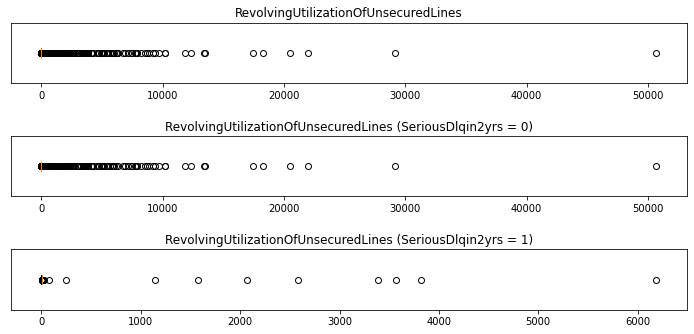

In [118]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(training_data["RevolvingUtilizationOfUnsecuredLines"], vert=False)
ax = plt.gca()
ax.set_title("RevolvingUtilizationOfUnsecuredLines")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 0]["RevolvingUtilizationOfUnsecuredLines"], vert=False)
ax = plt.gca()
ax.set_title("RevolvingUtilizationOfUnsecuredLines (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 1]["RevolvingUtilizationOfUnsecuredLines"], vert=False)
ax = plt.gca()
ax.set_title("RevolvingUtilizationOfUnsecuredLines (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()

In [135]:
training_data["RevolvingUtilizationOfUnsecuredLines"].describe()

count    120269.000000
mean          5.899873
std         257.040685
min           0.000000
25%           0.035084
50%           0.177282
75%           0.579428
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

Immediately, I can see that there are some quite significant outliers. To get a better result, I will be removing significant outliers, namely those farther than (std / mean) + mean since our std is extremely high compared to our mean.

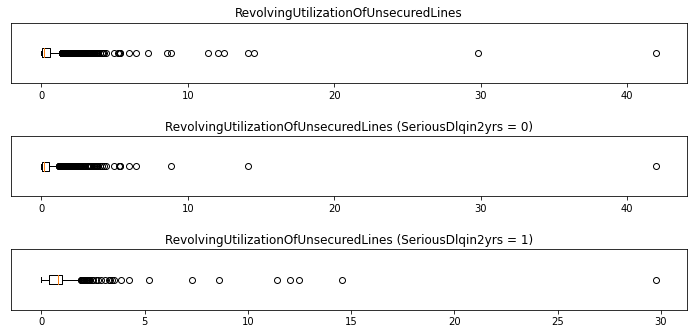

count    120103.000000
mean          0.334732
std           0.400968
min           0.000000
25%           0.034962
50%           0.176658
75%           0.576889
max          42.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64


In [158]:
mean = training_data["RevolvingUtilizationOfUnsecuredLines"].mean()
std = training_data["RevolvingUtilizationOfUnsecuredLines"].std()

processed_data = training_data[training_data["RevolvingUtilizationOfUnsecuredLines"] <= std / mean + mean]

fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(processed_data["RevolvingUtilizationOfUnsecuredLines"], vert=False)
ax = plt.gca()
ax.set_title("RevolvingUtilizationOfUnsecuredLines")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(processed_data[processed_data["SeriousDlqin2yrs"] == 0]["RevolvingUtilizationOfUnsecuredLines"], vert=False)
ax = plt.gca()
ax.set_title("RevolvingUtilizationOfUnsecuredLines (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(processed_data[processed_data["SeriousDlqin2yrs"] == 1]["RevolvingUtilizationOfUnsecuredLines"], vert=False)
ax = plt.gca()
ax.set_title("RevolvingUtilizationOfUnsecuredLines (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()
print(processed_data["RevolvingUtilizationOfUnsecuredLines"].describe())

We can see that there is already starting to be some distance between the two classes for this feature.
### Age
In this section, I will be analyzing/cleaning the age feature.

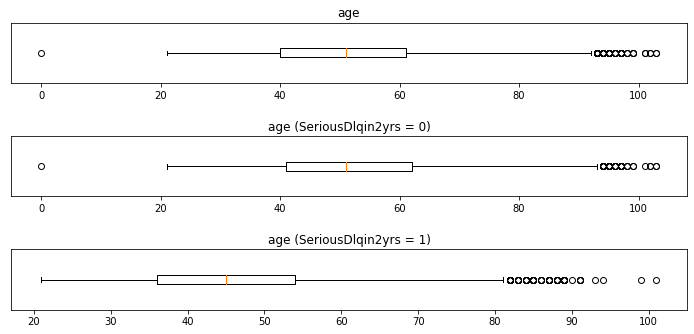

count    120269.000000
mean         51.289792
std          14.426684
min           0.000000
25%          40.000000
50%          51.000000
75%          61.000000
max         103.000000
Name: age, dtype: float64


In [3]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(training_data["age"], vert=False)
ax = plt.gca()
ax.set_title("age")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 0]["age"], vert=False)
ax = plt.gca()
ax.set_title("age (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 1]["age"], vert=False)
ax = plt.gca()
ax.set_title("age (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()

print(training_data["age"].describe())

The data looks somewhat clean. I do see that there are some cases where the age is 0, which should not be considered and will be removed.

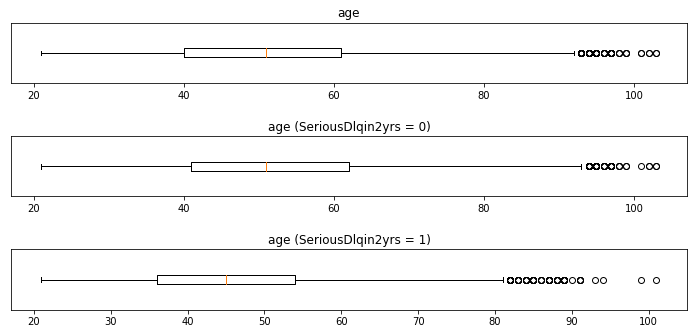

count    120268.000000
mean         51.290219
std          14.425986
min          21.000000
25%          40.000000
50%          51.000000
75%          61.000000
max         103.000000
Name: age, dtype: float64


In [5]:
processed_data = training_data[training_data["age"] > 0]

fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(processed_data["age"], vert=False)
ax = plt.gca()
ax.set_title("age")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(processed_data[processed_data["SeriousDlqin2yrs"] == 0]["age"], vert=False)
ax = plt.gca()
ax.set_title("age (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(processed_data[processed_data["SeriousDlqin2yrs"] == 1]["age"], vert=False)
ax = plt.gca()
ax.set_title("age (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()
print(processed_data["age"].describe())

There seems to be some differentiation between the two classes but there is quite a bit of overlap.
### NumberOfTime30-59DaysPastDueNotWorse
In this section, I will be analyzing/cleaning the NumberOfTime30-59DaysPastDueNotWorse feature.

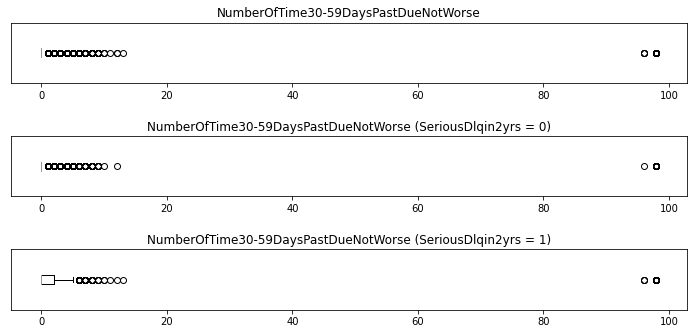

count    120269.000000
mean          0.381769
std           3.499234
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64


In [6]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(training_data["NumberOfTime30-59DaysPastDueNotWorse"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfTime30-59DaysPastDueNotWorse")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 0]["NumberOfTime30-59DaysPastDueNotWorse"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfTime30-59DaysPastDueNotWorse (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 1]["NumberOfTime30-59DaysPastDueNotWorse"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfTime30-59DaysPastDueNotWorse (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()

print(training_data["NumberOfTime30-59DaysPastDueNotWorse"].describe())

There does not seem to be any obvious outliers as the values are well within the realm of possibilities, so cleaning is not essential here, but I want to highlight the separation even more. It should also be recognized that the maximum value this feature can take is 25. (2 years / 30 days = 24.333)

We can currently see a little separation between the two classes for this feature.

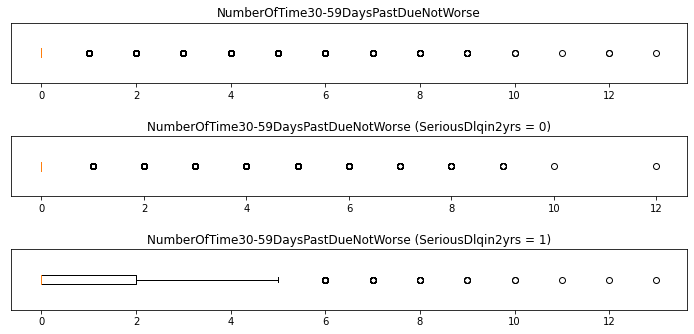

count    120121.000000
mean          0.261561
std           0.719067
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64


In [12]:
processed_data = training_data[training_data["NumberOfTime30-59DaysPastDueNotWorse"] <= 25]

fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(processed_data["NumberOfTime30-59DaysPastDueNotWorse"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfTime30-59DaysPastDueNotWorse")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(processed_data[processed_data["SeriousDlqin2yrs"] == 0]["NumberOfTime30-59DaysPastDueNotWorse"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfTime30-59DaysPastDueNotWorse (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(processed_data[processed_data["SeriousDlqin2yrs"] == 1]["NumberOfTime30-59DaysPastDueNotWorse"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfTime30-59DaysPastDueNotWorse (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()
print(processed_data["NumberOfTime30-59DaysPastDueNotWorse"].describe())

Now there is a very apparent separation between the two classes.
### DebtRatio
In this section, we will be analyzing/cleaning the DebtRatio feature.

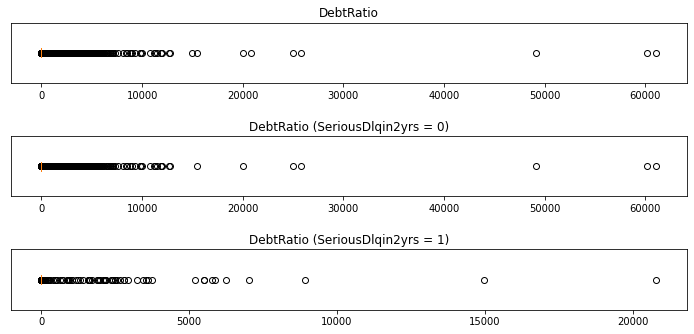

count    120269.000000
mean         26.598777
std         424.446457
min           0.000000
25%           0.143388
50%           0.296023
75%           0.482559
max       61106.500000
Name: DebtRatio, dtype: float64


In [7]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(training_data["DebtRatio"], vert=False)
ax = plt.gca()
ax.set_title("DebtRatio")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 0]["DebtRatio"], vert=False)
ax = plt.gca()
ax.set_title("DebtRatio (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 1]["DebtRatio"], vert=False)
ax = plt.gca()
ax.set_title("DebtRatio (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()

print(training_data["DebtRatio"].describe())

It looks like a very small proportion of our exceeeds an enourmous threshhold, so similarly to the previous feature, we will process the data so that we can hopefully gain a more apparent separation between our two classes.

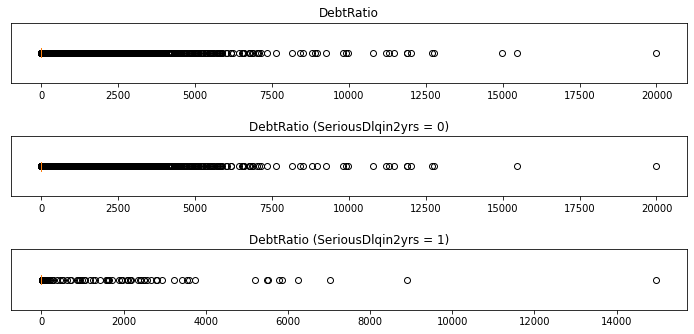

count    120263.000000
mean         24.587237
std         290.978602
min           0.000000
25%           0.143382
50%           0.296000
75%           0.482539
max       20000.000000
Name: DebtRatio, dtype: float64


In [16]:
processed_data = training_data[training_data["DebtRatio"] <= 20000]

fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(processed_data["DebtRatio"], vert=False)
ax = plt.gca()
ax.set_title("DebtRatio")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(processed_data[processed_data["SeriousDlqin2yrs"] == 0]["DebtRatio"], vert=False)
ax = plt.gca()
ax.set_title("DebtRatio (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(processed_data[processed_data["SeriousDlqin2yrs"] == 1]["DebtRatio"], vert=False)
ax = plt.gca()
ax.set_title("DebtRatio (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()

print(processed_data["DebtRatio"].describe())

Now a more apparent separation can be seen for our two classes. 

### MonthlyIncome
In this section, I will be analyzing/cleaning the MonthlyIncome feature.

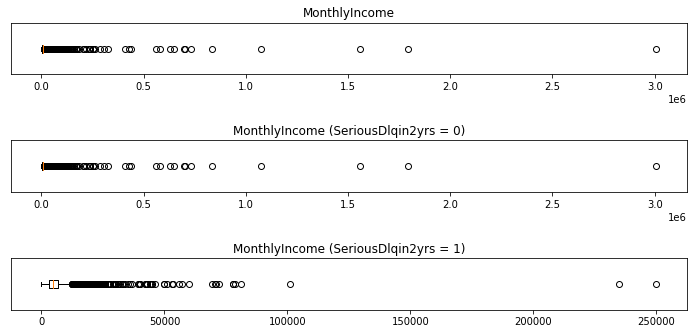

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64


In [17]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(training_data["MonthlyIncome"], vert=False)
ax = plt.gca()
ax.set_title("MonthlyIncome")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 0]["MonthlyIncome"], vert=False)
ax = plt.gca()
ax.set_title("MonthlyIncome (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 1]["MonthlyIncome"], vert=False)
ax = plt.gca()
ax.set_title("MonthlyIncome (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()

print(training_data["MonthlyIncome"].describe())

There are some huge outliers in this feature, but it can be expected with a large sample size. Separation seems to be apparent as well already, so no cleaning necessary here.
#### NumberOfOpenCreditLinesAndLoans
In this section, I will be analyzing/cleaning the NumberOfOpenCreditLinesAndLoans feature.

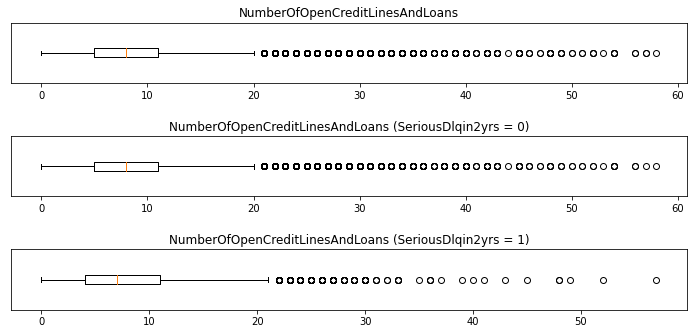

count    120269.000000
mean          8.758475
std           5.172835
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64


In [18]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(training_data["NumberOfOpenCreditLinesAndLoans"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfOpenCreditLinesAndLoans")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 0]["NumberOfOpenCreditLinesAndLoans"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfOpenCreditLinesAndLoans (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 1]["NumberOfOpenCreditLinesAndLoans"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfOpenCreditLinesAndLoans (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()

print(training_data["NumberOfOpenCreditLinesAndLoans"].describe())

From a visual inspection, this feature looks clean enough to work with. No apparent separation is present, however.
### NumberOfTimes90DaysLate
In this section, I will be analyzing/cleaning the NumberOfTimes90DaysLate feature.

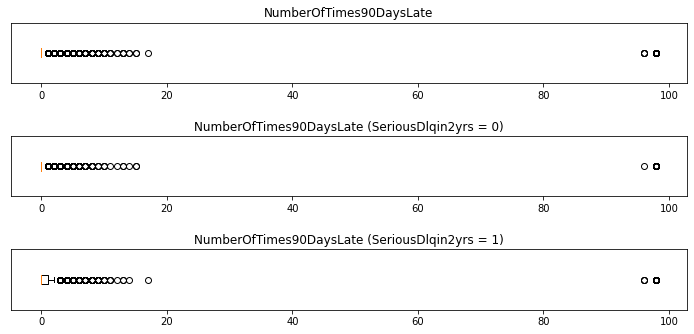

count    120269.000000
mean          0.211925
std           3.465276
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTimes90DaysLate, dtype: float64


In [19]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(training_data["NumberOfTimes90DaysLate"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfTimes90DaysLate")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 0]["NumberOfTimes90DaysLate"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfTimes90DaysLate (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 1]["NumberOfTimes90DaysLate"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfTimes90DaysLate (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()

print(training_data["NumberOfTimes90DaysLate"].describe())

While there are some outliers, none of them are ridicuously large enough to omit from our data. Some separation in our classes can be seen, but for now no cleaning is necessary.

### NumberRealEstateLoansOrLines
In this section, I will be analyzing/cleaning the NumberRealEstateLoansOrLines feature.

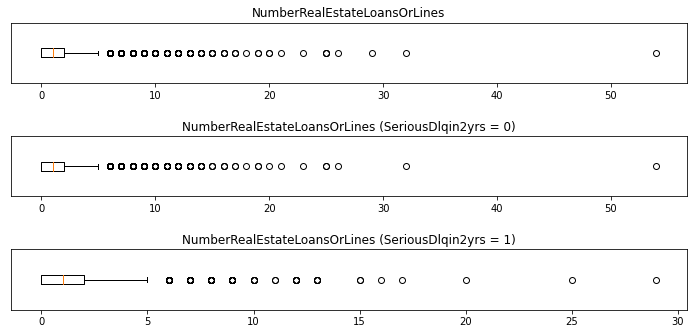

count    120269.000000
mean          1.054519
std           1.149273
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64


In [20]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(training_data["NumberRealEstateLoansOrLines"], vert=False)
ax = plt.gca()
ax.set_title("NumberRealEstateLoansOrLines")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 0]["NumberRealEstateLoansOrLines"], vert=False)
ax = plt.gca()
ax.set_title("NumberRealEstateLoansOrLines (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 1]["NumberRealEstateLoansOrLines"], vert=False)
ax = plt.gca()
ax.set_title("NumberRealEstateLoansOrLines (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()

print(training_data["NumberRealEstateLoansOrLines"].describe())

From a visual inspection, this feature looks clean enough to work with. There is some separation, but it is not vastly different.

### NumberOfTime60-89DaysPastDueNotWorse
In this section, I will be analyzing/cleaning the NumberOfTime60-89DaysPastDueNotWorse feature.

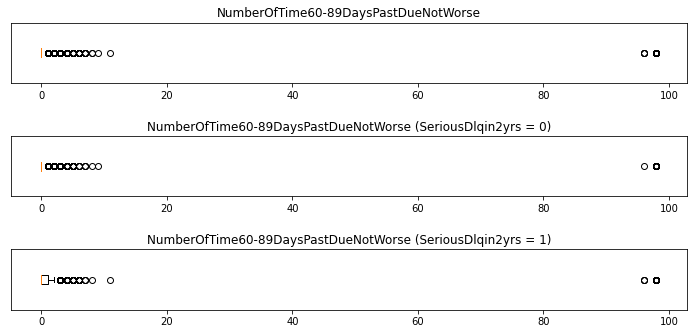

count    120269.000000
mean          0.187829
std           3.447901
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          98.000000
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: float64


In [21]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(training_data["NumberOfTime60-89DaysPastDueNotWorse"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfTime60-89DaysPastDueNotWorse")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 0]["NumberOfTime60-89DaysPastDueNotWorse"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfTime60-89DaysPastDueNotWorse (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 1]["NumberOfTime60-89DaysPastDueNotWorse"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfTime60-89DaysPastDueNotWorse (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()

print(training_data["NumberOfTime60-89DaysPastDueNotWorse"].describe())

While there are some outliers, none of them are ridicuously large enough to omit from our data. Some separation in our classes can be seen, but for now no cleaning is necessary.

### NumberOfDependents
In this section, I will be analyzing/cleaning the NumberOfDependents feature.

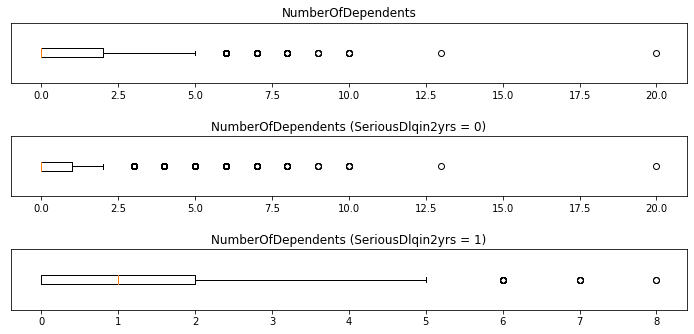

count    120269.000000
mean          0.851832
std           1.148391
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          20.000000
Name: NumberOfDependents, dtype: float64


In [23]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1)
plt.boxplot(training_data["NumberOfDependents"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfDependents")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 2)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 0]["NumberOfDependents"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfDependents (SeriousDlqin2yrs = 0)")
ax.get_yaxis().set_visible(False)

plt.subplot(3, 1, 3)
plt.boxplot(training_data[training_data["SeriousDlqin2yrs"] == 1]["NumberOfDependents"], vert=False)
ax = plt.gca()
ax.set_title("NumberOfDependents (SeriousDlqin2yrs = 1)")
ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=2.0)
plt.show()

print(training_data["NumberOfDependents"].describe())

From a visual inspection, this feature looks clean enough to work with. There is some separation, but it is not vastly different.

## Data Processing
For the following features, by the analysis carried out above, we did the following steps to clean/process them:
- __RevolvingUtilizationOfUnsecuredLines__: Filter out results that are greater than the mean + (std / mean) to get rid of major outliers
- __age__: Filter out results with age = 0
- __NumberOfTime30-59DaysPastDueNotWorse__: Filter out results greater than 25
- __DebtRatio__: Filter out results greater than 20,000%
- __MonthlyIncome__: Filter out results that have Nan
- __NumberOfDependents__: Filter out results that have Nan

The rest of the features have workable data, so no filtering is necessary

In [5]:
import pandas as pd

training_data = pd.read_csv("./Cleaned Data/Analysis/data.csv", index_col=False)

# RevolvingUtilizationOfUnsecuredLines Cleaning
mean = training_data["RevolvingUtilizationOfUnsecuredLines"].mean()
std = training_data["RevolvingUtilizationOfUnsecuredLines"].std()
cleaned_data = training_data[training_data["RevolvingUtilizationOfUnsecuredLines"] <= std / mean + mean]
# Age Cleaning
cleaned_data = cleaned_data[cleaned_data["age"] > 0]
# NumberOfTime30-59DaysPastDueNotWorse Cleaning
cleaned_data = cleaned_data[cleaned_data["NumberOfTime30-59DaysPastDueNotWorse"] <= 25]
# DebtRatio Cleaning
cleaned_data = cleaned_data[cleaned_data["DebtRatio"] <= 20000]
# MonthlyIncome and NumberOfDependents Cleaning
cleaned_data.dropna(inplace = True)

training_data.to_csv("./Cleaned Data/Analysis/cleaned_data.csv", index=False)

print(cleaned_data.shape)
print(cleaned_data.describe())

(119948, 11)
       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     119948.000000                         119948.000000  119948.000000   
mean           0.068880                              0.333902      51.312394   
std            0.253251                              0.400530      14.417367   
min            0.000000                              0.000000      21.000000   
25%            0.000000                              0.034886      41.000000   
50%            0.000000                              0.176137      51.000000   
75%            0.000000                              0.574390      61.000000   
max            1.000000                             42.000000     103.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         119948.000000  119948.000000   1.199480e+05   
mean                               0.261688      24.626252   6.673040e+03   
std                                

## Data Preparation

In [ ]:
import pandas as pd

training_data = pd.read_csv("./Raw Data/cs-training.csv", index_col=0)
test_data = pd.read_csv("./Raw Data/cs-test.csv", index_col=0)

# Dropping Nan since Nan seems to mean that no entry submitted for Monthly Income or Number of Dependents
training_data.dropna(inplace = True)
# Monthly income and Dependents are given as Integers
training_data = training_data.astype({"NumberOfDependents":'int', "MonthlyIncome":'int'}) 
# Splitting Training Data into Training and Validation
training_data_X = training_data[training_data.columns.drop('SeriousDlqin2yrs')]
training_data_Y = training_data[["SeriousDlqin2yrs"]]

split_index = int(len(training_data_X) * 0.2)

validation_data_X = training_data_X.iloc[:split_index, :]
validation_data_Y = training_data_Y.iloc[:split_index, :]

training_data_X = training_data_X.iloc[split_index:, :]
training_data_Y = training_data_Y.iloc[split_index:, :]

test_data_X = test_data[test_data.columns.drop('SeriousDlqin2yrs')]

training_data_X.to_csv("./Cleaned Data/Train/train_X.csv", index=False)
training_data_Y.to_csv("./Cleaned Data/Train/train_Y.csv", index=False)

validation_data_X.to_csv("./Cleaned Data/Validation/valid_X.csv", index=False)
validation_data_Y.to_csv("./Cleaned Data/Validation/valid_Y.csv", index=False)

test_data_X.to_csv("./Cleaned Data/Test/test_X.csv", index=False)

training_data.to_csv("./Cleaned Data/Analysis/data.csv", index=False)